## H2 VQE using a user-defined Hamiltonion

This notebook feautures a VQE trial that uses a user-defined Hamiltonian, namely, the hamiltonian used in Yamamoto (2019) in the 2-qubit example. We examine the performance of the quantum natural gradient compared to the the vanilla gradient descent optimizer for this small VQE problem.

In [1]:
#import packages
import numpy as np
import pennylane as qml
from pennylane import Hamiltonian, VQECost
from run_vqe import run_vqe

In [2]:
dev = qml.device("default.qubit", wires=2)

#create ansatz 
def ansatz(params, wires):
    
    #parameterized layer 0
    qml.RY(params[0], wires=0)
    qml.RY(params[1], wires=1)
    
    #entanglement
    qml.CNOT(wires=[0,1])
    
    #param layer 1
    qml.RY(params[2], wires=0)
    qml.RY(params[3], wires=1)


In [3]:
alpha = 0.4
beta = 0.2
coeffs = [alpha, alpha, beta]

#H2 hamiltonian from Yamamoto 2019
obs_list = [
    qml.PauliZ(0) @ qml.Identity(1),
    qml.Identity(0) @ qml.PauliZ(1),
    qml.PauliX(0) @ qml.PauliX(1)
]

#create qnodes
ham = qml.Hamiltonian(coeffs, obs_list)

#create cost function
cost = VQECost(ansatz, ham, dev)

init_params = np.array([-0.2,-0.2,0,0])
max_iter = 200
step_size = 0.05

In [9]:
print("QNG RUN")
qng_run = run_vqe(cost, max_iter, init_params, 'QNGOptimizer', step_size, diag_approx=False)

print("VANILLA RUN")
vanilla_run = run_vqe(cost, max_iter, init_params, 'GradientDescentOptimizer', step_size)

QNG RUN
Iteration = 0,  Ground-state energy = 0.70579155 Ha,  Convergence parameter = 0.03071341 Ha
Iteration = 20,  Ground-state energy = -0.81912764 Ha,  Convergence parameter = 0.00201111 Ha
Iteration = 40,  Ground-state energy = -0.82454651 Ha,  Convergence parameter = 0.00001366 Ha
VANILLA RUN
Iteration = 0,  Ground-state energy = 0.72935795 Ha,  Convergence parameter = 0.00714701 Ha
Iteration = 20,  Ground-state energy = 0.41356031 Ha,  Convergence parameter = 0.02600043 Ha
Iteration = 40,  Ground-state energy = -0.24865113 Ha,  Convergence parameter = 0.03199803 Ha
Iteration = 60,  Ground-state energy = -0.65176630 Ha,  Convergence parameter = 0.01061696 Ha
Iteration = 80,  Ground-state energy = -0.76504295 Ha,  Convergence parameter = 0.00290410 Ha
Iteration = 100,  Ground-state energy = -0.79938512 Ha,  Convergence parameter = 0.00101500 Ha
Iteration = 120,  Ground-state energy = -0.81246672 Ha,  Convergence parameter = 0.00042274 Ha
Iteration = 140,  Ground-state energy = -0.

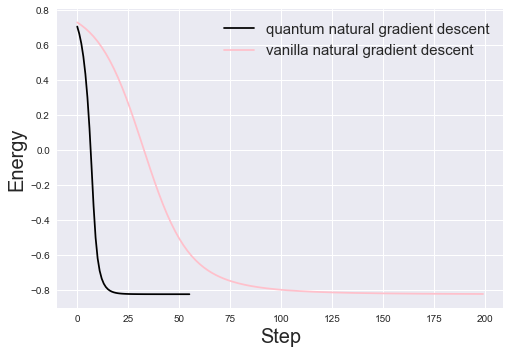

In [10]:
from matplotlib import pyplot as plt
plt.style.use("seaborn")
plt.plot(qng_run, "black", label="quantum natural gradient descent")
plt.plot(vanilla_run, "pink", label="vanilla natural gradient descent")

plt.ylabel("Energy", fontsize=20)
plt.xlabel("Step", fontsize=20)
plt.legend(fontsize=15)
plt.show()